#### 1. Develop a program to build and train a **Feedforward Neural Network** from scratch using a deep learning framework like TensorFlow, keras etc. 
Multi-class Classification on mnist dataset from `tensorflow.keras.datasets`.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Input # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2344 - accuracy: 0.9300 - val_loss: 0.1282 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0982 - accuracy: 0.9699 - val_loss: 0.0878 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0702 - accuracy: 0.9778 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0768 - val_accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0764 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0840 - val_accuracy:

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 0s 760us/step - loss: 0.0973 - accuracy: 0.9761
Test Loss: 0.0973
Test Accuracy: 97.61%


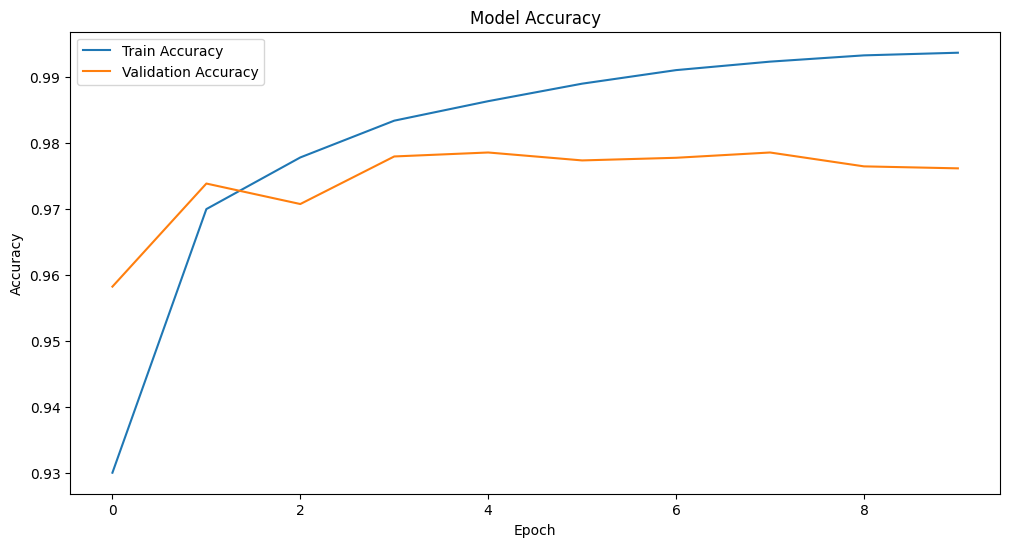

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()